In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


## **BUSINESS UNDERSTANDING**

Understanding of the **processes involved**, resources, constraints, requirements... and definition of **objectives and KPIs**.

Contexto:

[https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)


*Processes involved: Data retrieval. Loading of iris data sets
*Objectives:
* *Supervised Algorithm* (**Classification**): labelled data sets (inputs and outputs). Outputs: limited number of classes
* Supervised Algorithm* (**Regression**): labelled data sets (inputs and outputs). Outputs: continuous numerical value
* *Unsupervised Algorithm* (**Clustering**): Unlabelled dataset (inputs). No a-priori knowledge.

*KPIs:
Achieve less than 5% error, reduce error by %....

## **DATA UNDERSTANDING**

```
# Tiene formato de código
```

Loading data

First of all, we import the "pandas" library that allows the handling and analysis of data structures:



```
# Tiene formato de código
```


*   DataFrame
*   Series

The download of data is done from a url, where the csv format dataset is stored, we indicate columns with the features (characteristics of the dataset). Below is a description of the contents

In [2]:
url = "https://pkgstore.datahub.io/machine-learning/dermatology/dermatology_csv/data/8a7c88e486ea2cb227adc99d0de841d1/dermatology_csv.csv"
dermatology = pd.read_csv(url, skiprows=0, delimiter=',')
dermatology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**Exploring and analysis of the data**

In [3]:
dermatology.head()
dermatology.tail(3)
#dermatology.shape
#dermatology.index
#dermatology.columns
#dermatology['class']
#dermatology.dtypes
dermatology.describe() #Coinciden todos --> entonces no existe NaN

erythema     scaling  definite_borders     itching   
count  366.000000  366.000000        366.000000  366.000000  \
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules   
count          366.000000         366.000000          366.000000  \
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement   
count                366.000000                  366.000000  \
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer   
count         366.000000  ...                           366.000000  \
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis   
count                               366.000000  366.000000  \
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug   
count                     366.000000            366.000000  \
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate   
count                    366.000000                           366.000000  \
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

- Manage the missing the values

In [4]:
pd.set_option('display.max_rows', None)

dermatology.isnull().sum() #Contar los valores NaN

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Because removing the 8 rows with NaN ages represents 2% of the dataset values we will not remove the rows and opt to swap the NaN values for the mean age.

In [5]:
average_age = dermatology['age'].mean()
dermatology['age']= dermatology['age'].fillna(average_age)
dermatology.describe()

erythema     scaling  definite_borders     itching   
count  366.000000  366.000000        366.000000  366.000000  \
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules   
count          366.000000         366.000000          366.000000  \
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement   
count                366.000000                  366.000000  \
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer   
count         366.000000  ...                           366.000000  \
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis   
count                               366.000000  366.000000  \
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug   
count                     366.000000            366.000000  \
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate   
count                    366.000000                           366.000000  \
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

Now we can observe that the 'age' column has 366 total values.

Nevertheless we still believe there could be more NaN values, due to the limited output offered by the notebook. For this purpose, we will define and execute a function which will verify if there are any NaN values left.

In [6]:
def find_nan_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            row_index = df[col].idxmax()
            return f"NaN value found in row {row_index} and column {col}"
    return "No NaN values found in the dataframe"

find_nan_values(dermatology)

'No NaN values found in the dataframe'

As we can see, there are no more missing values in the datashet, so we can continue with the next steps of data preprocessing.

- Description of the Dataset

In [7]:
dermatology.groupby('class').agg(["count","min","max","std","mean"])

erythema                             scaling                     
         count min max       std      mean   count min max       std   
class                                                                  
1          112   0   3  0.621370  2.285714     112   1   3  0.627296  \
2           61   1   3  0.609129  2.278689      61   1   3  0.543717   
3           72   0   3  0.599295  2.083333      72   0   3  0.659439   
4           49   1   3  0.586121  1.897959      49   1   2  0.505076   
5           52   0   3  0.671551  1.500000      52   0   3  0.627127   
6           20   1   3  0.510418  2.050000      20   1   2  0.444262   

                 ... band-like_infiltrate                               age   
           mean  ...                count min max       std      mean count   
class            ...                                                          
1      2.196429  ...                  112   0   2  0.210526  0.026786   112  \
2      2.065574  ...                   61   0   2  0.256074  0.032787    61   
3      1.625000  ...                   72   2   3  0.451046  2.722222    72   
4      1.510204  ...                   49   0   0  0.000000  0.000000    49   
5      1.134615  ...                   52   0   1  0.138675  0.019231    52   
6      1.750000  ...                   20   0   1  0.223607  0.050000    20   

                                         
        min   max        std       mean  
class                                    
1       0.0  75.0  15.584563  39.350858  
2      10.0  70.0  13.465765  35.480264  
3      16.0  65.0  11.687296  39.906890  
4      12.0  70.0  13.819151  35.291757  
5       8.0  70.0  14.835816  36.638161  
6       7.0  22.0   3.711646  10.250000  

[6 rows x 170 columns]

- Outlier detection

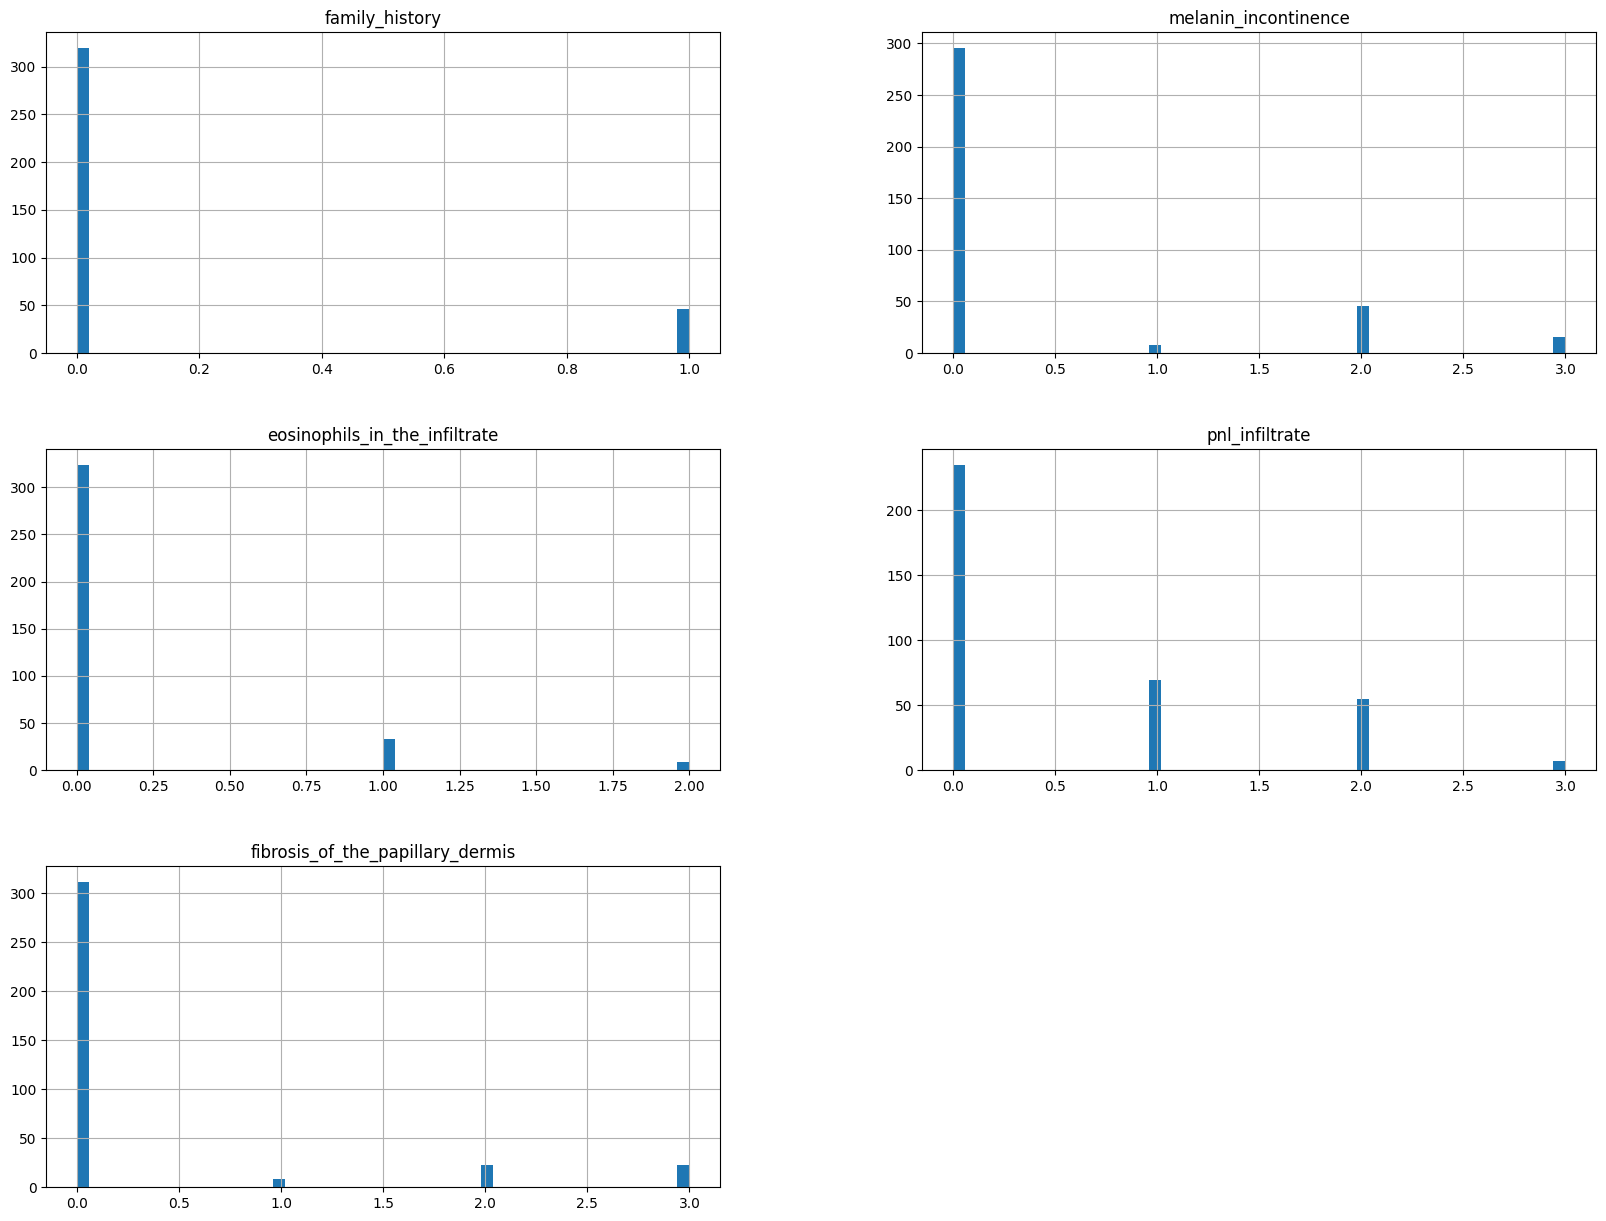

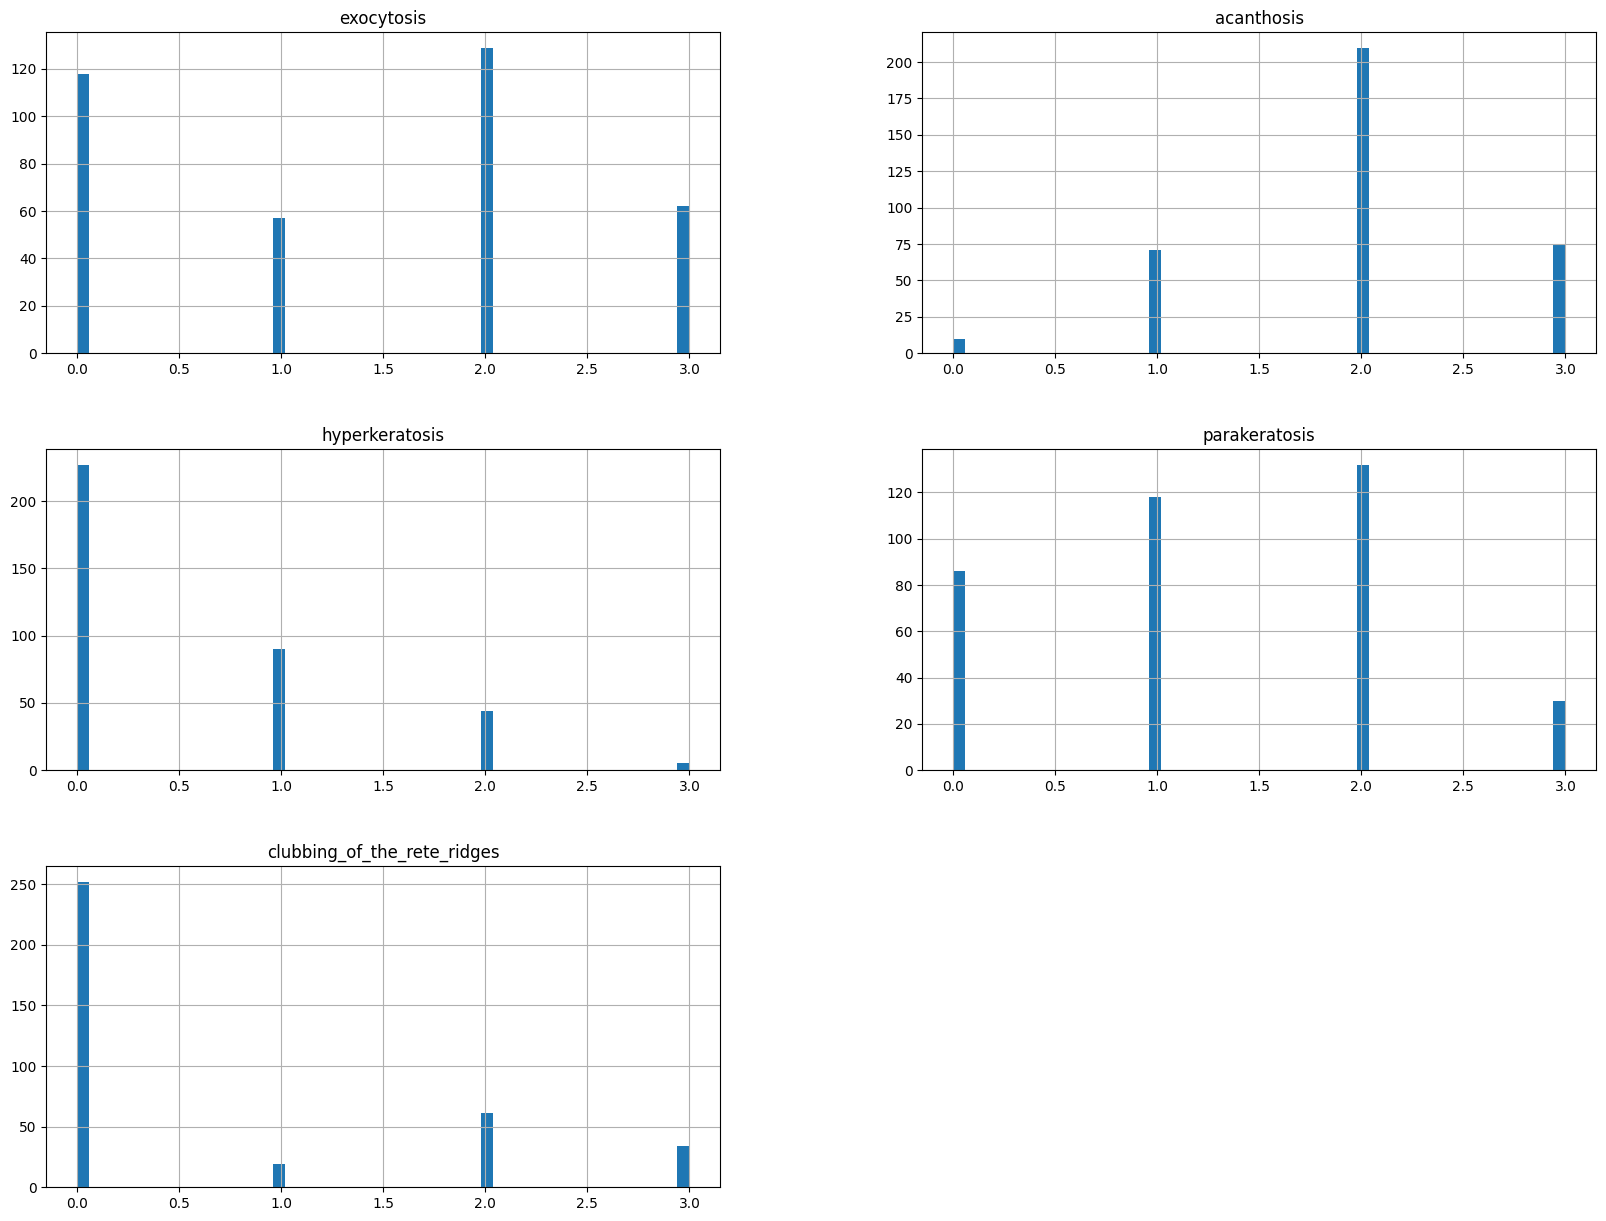

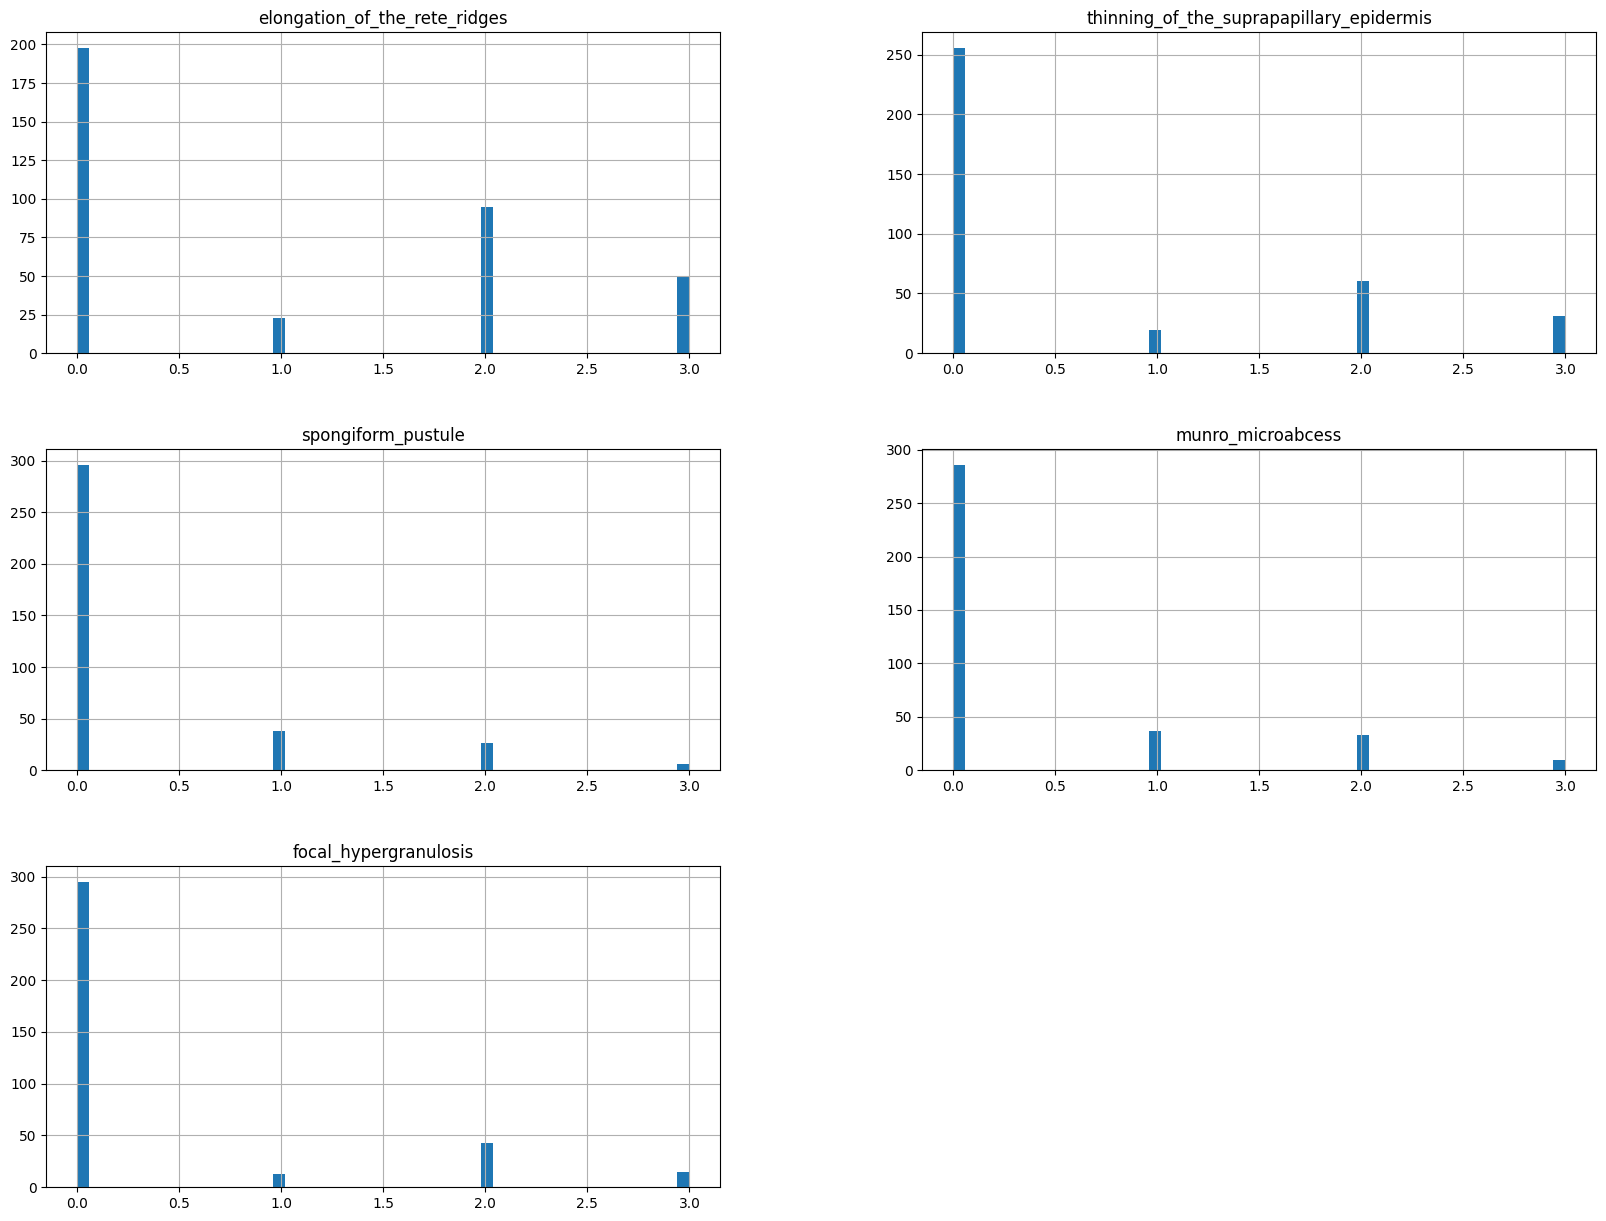

In [8]:
num_attributes = dermatology.shape[1]
num_plots = 5

for i in range(0, num_attributes, num_plots):
    dermatology.iloc[:, i:i+num_plots].hist(bins=50, figsize=(20,15))
    plt.show()

- Boxplot

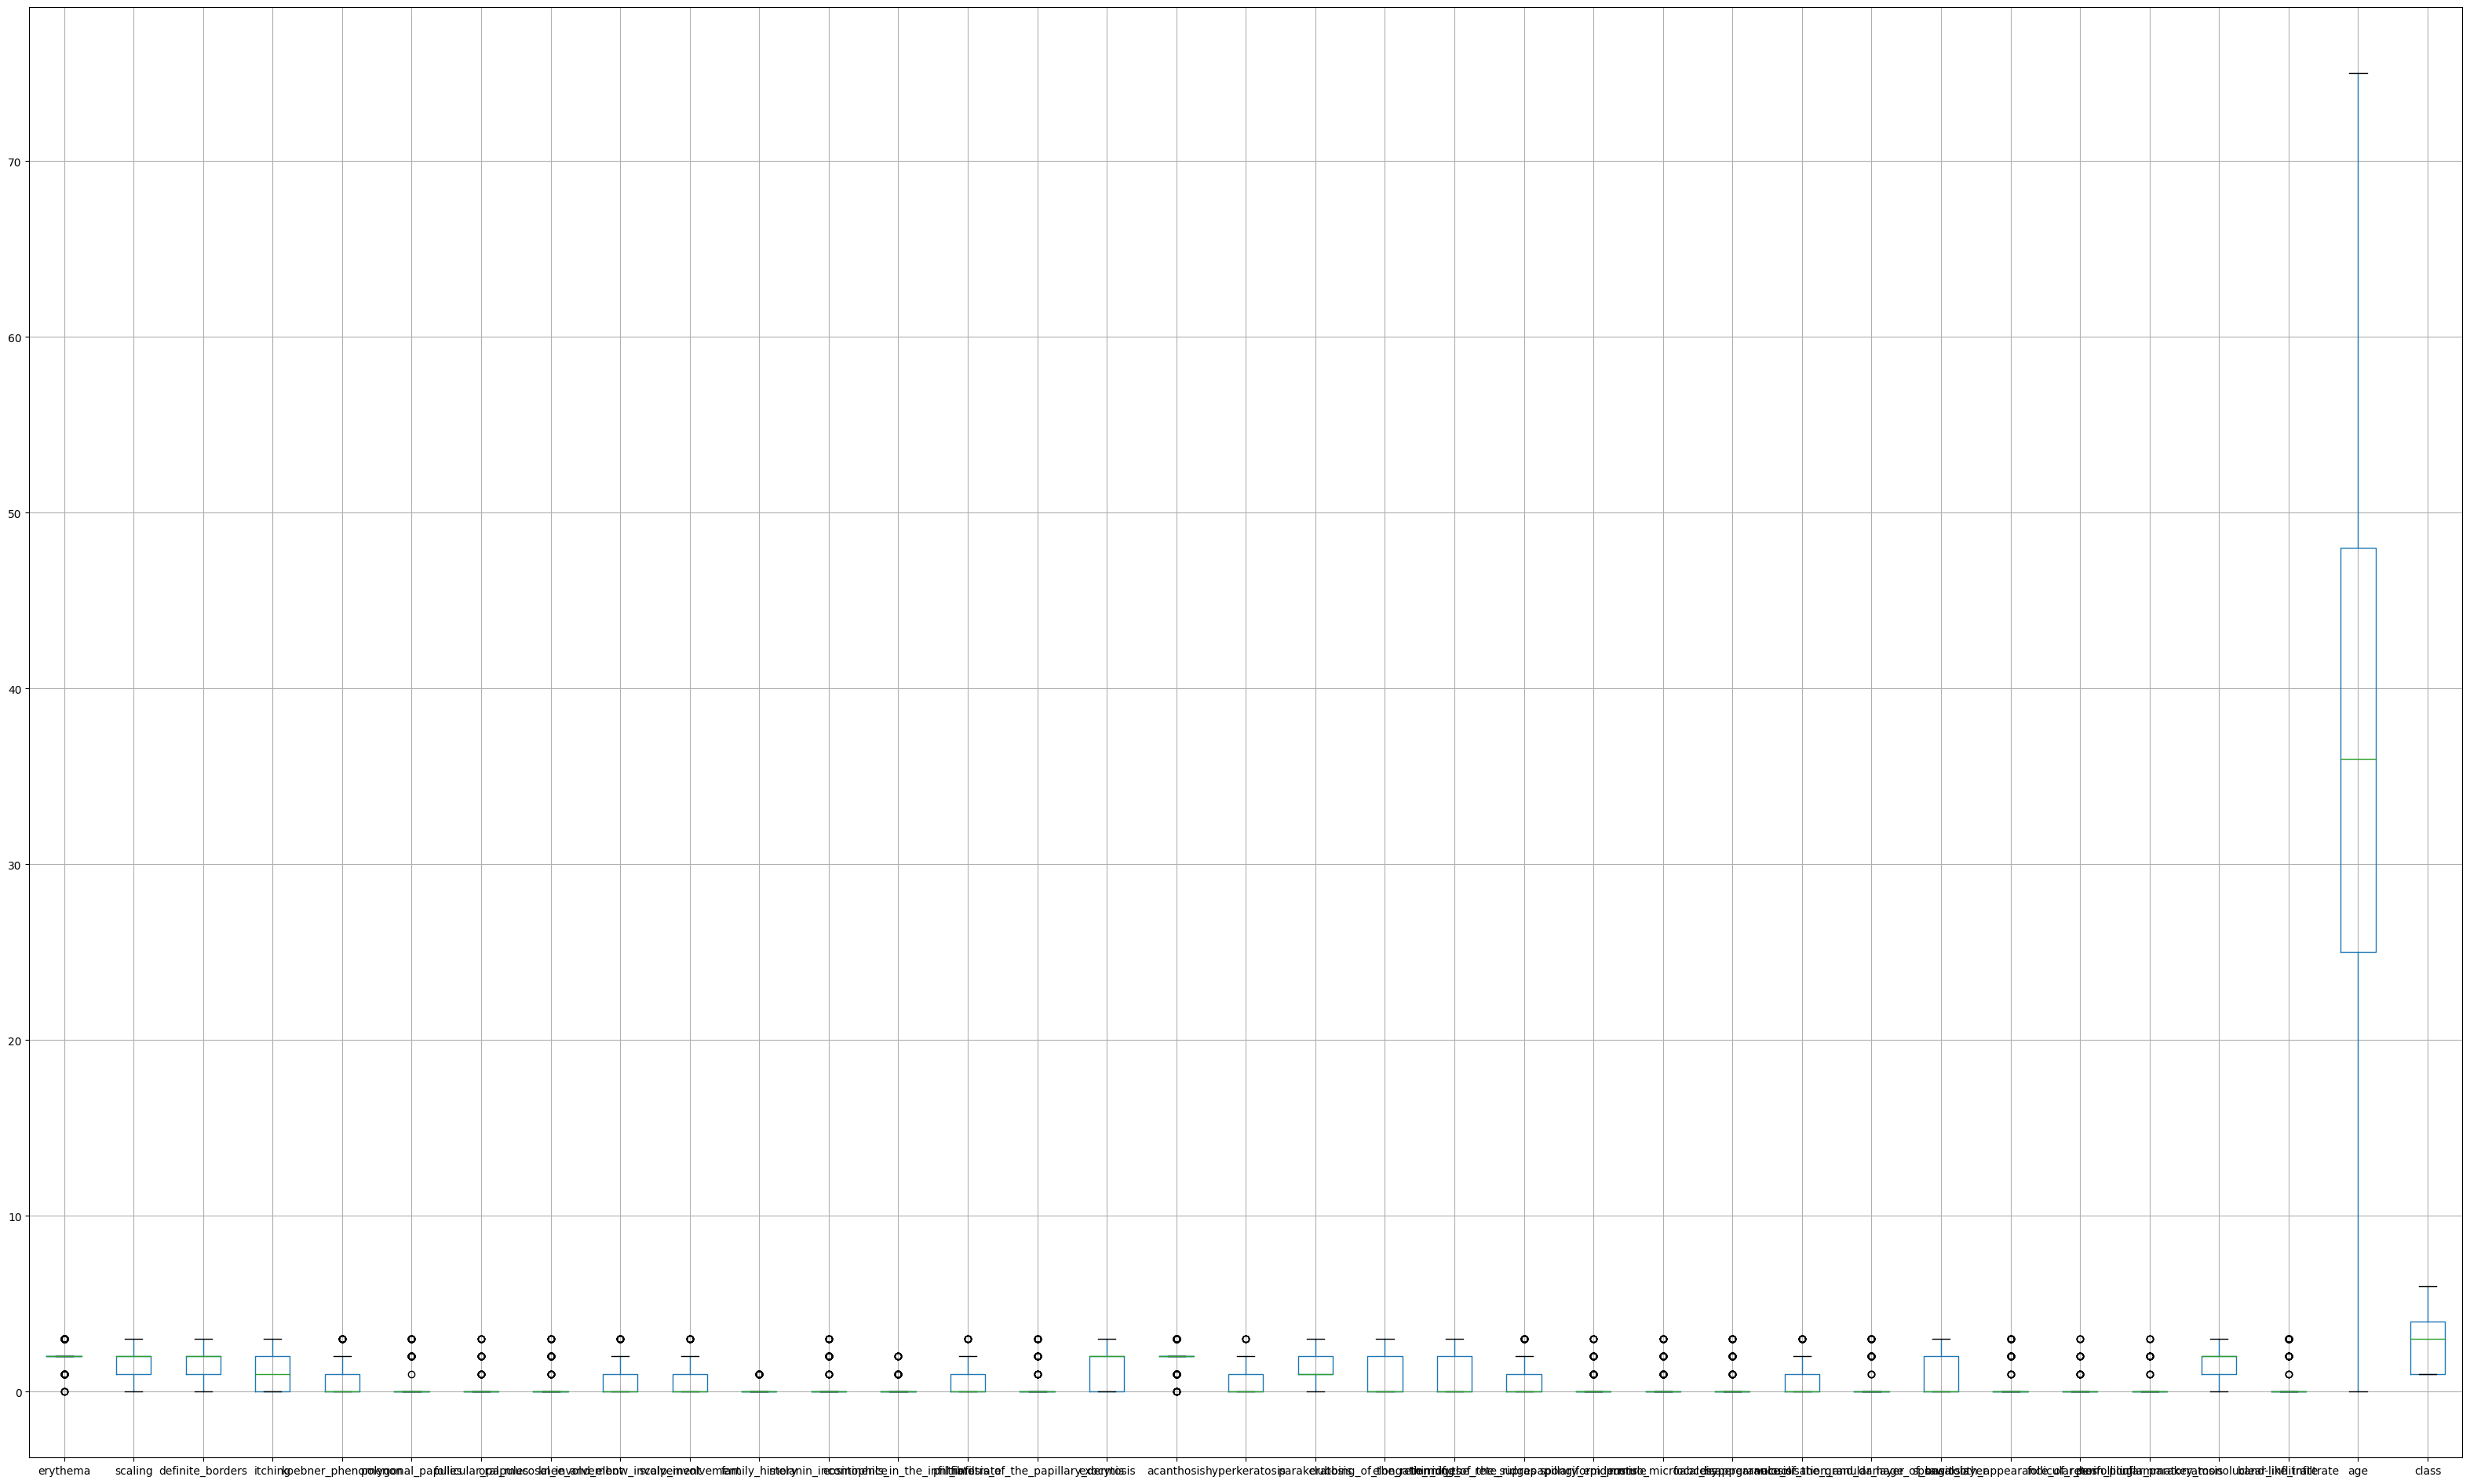

In [9]:
plt.figure(figsize=(40, 24)) # Tamaño personalizado de la figura
dermatology.boxplot()
plt.show()

- Parallel Coordinates

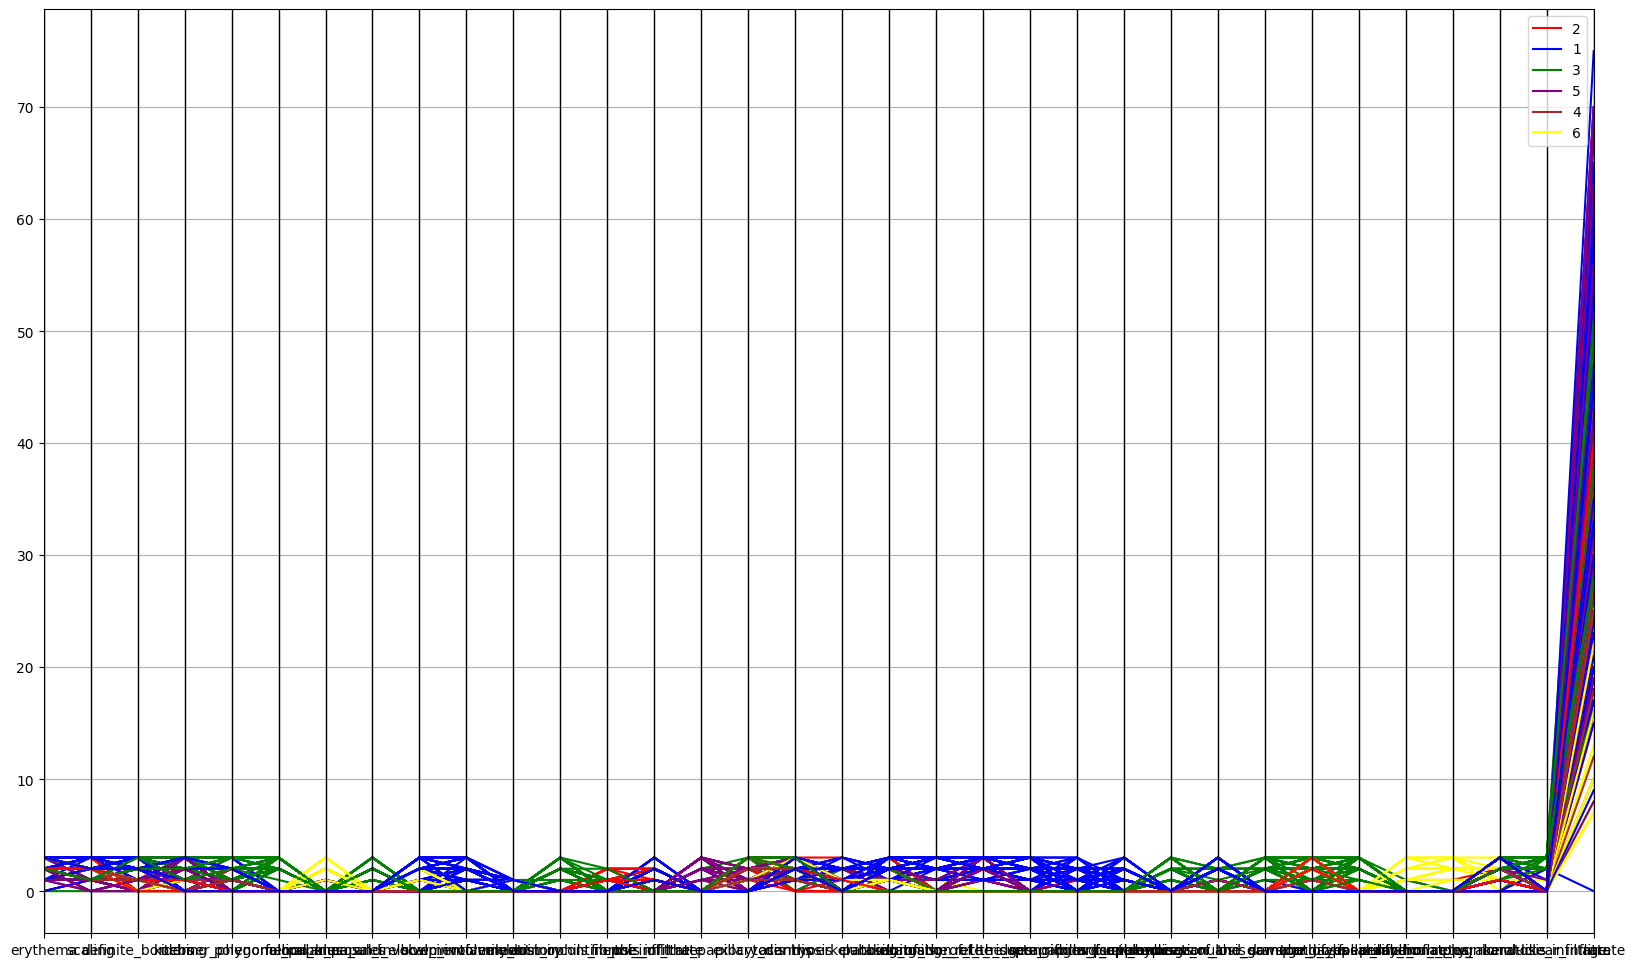

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20, 12)) # Tamaño personalizado de la figura
#We set a list of colors that are easier to distinguish
parallel_coordinates(dermatology, "class", color=['red', 'blue', 'green', 'purple', 'brown', 'yellow'])

plt.show()

- Histogram

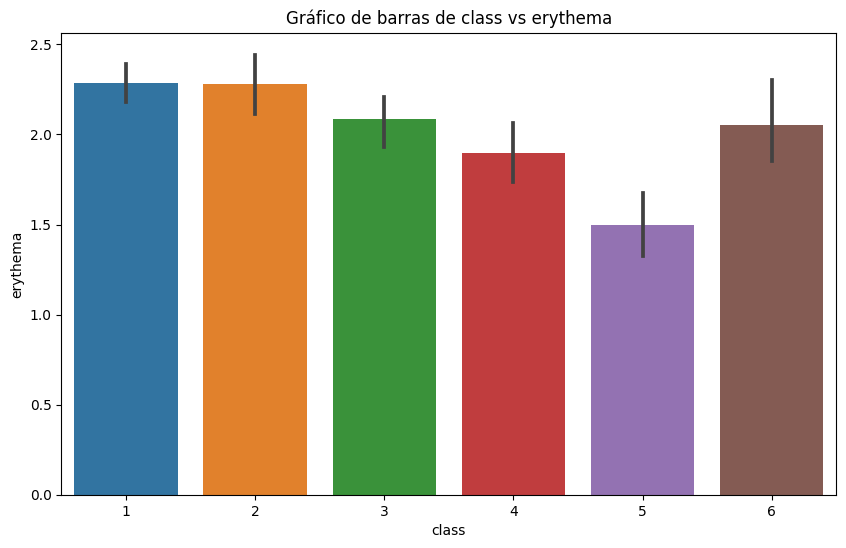

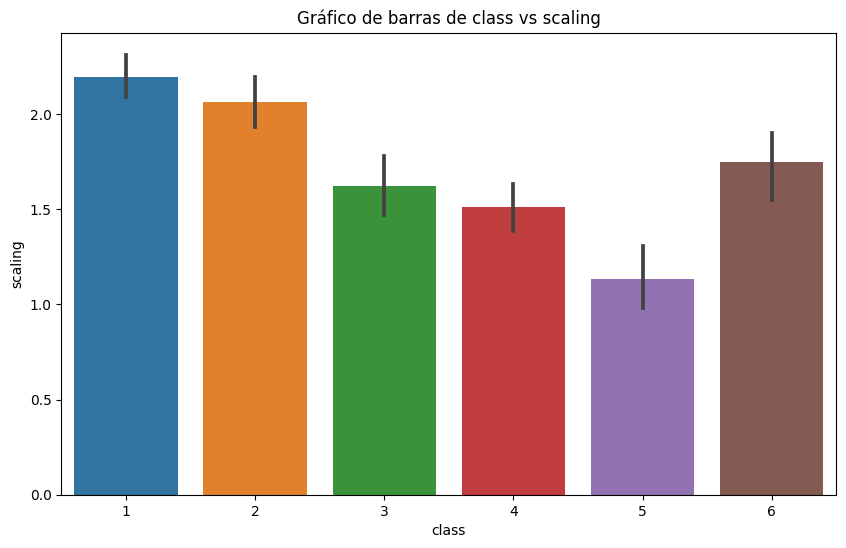

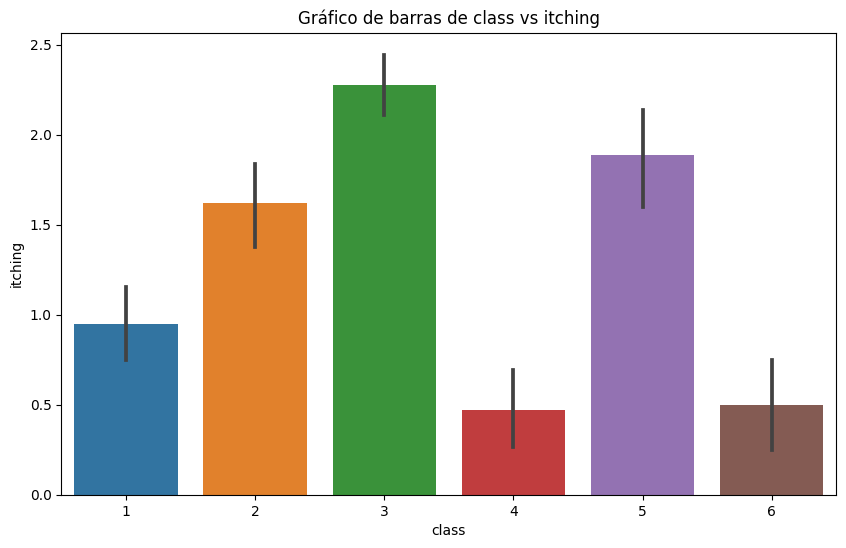

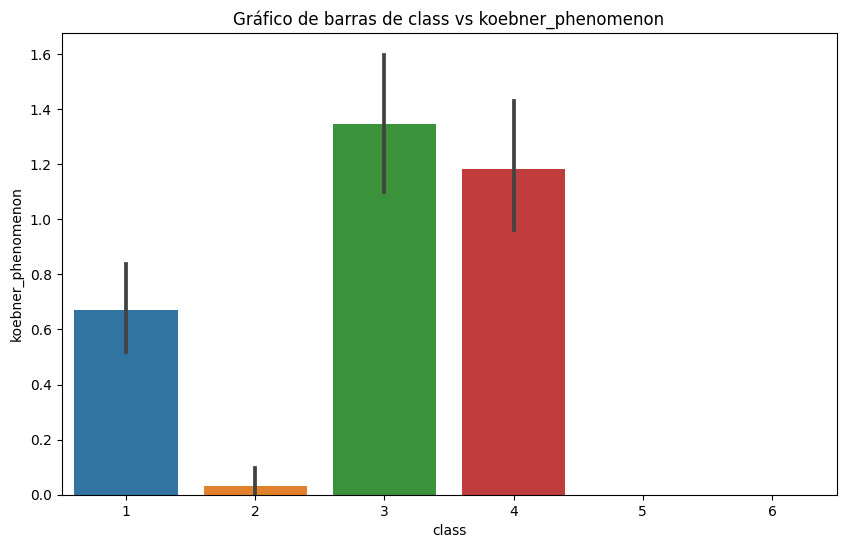

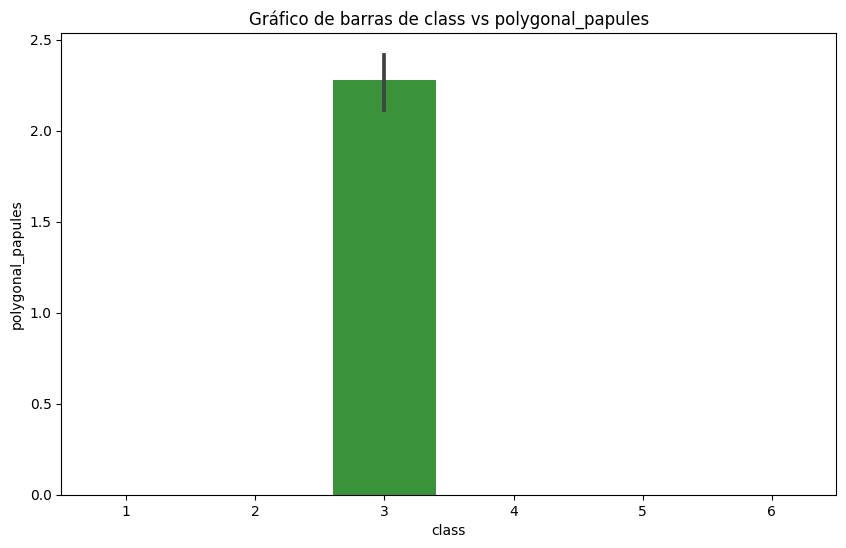

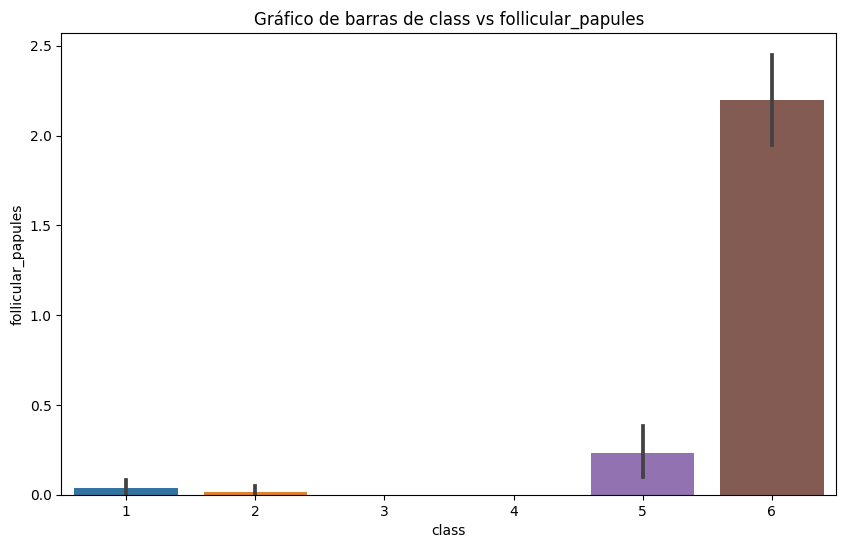

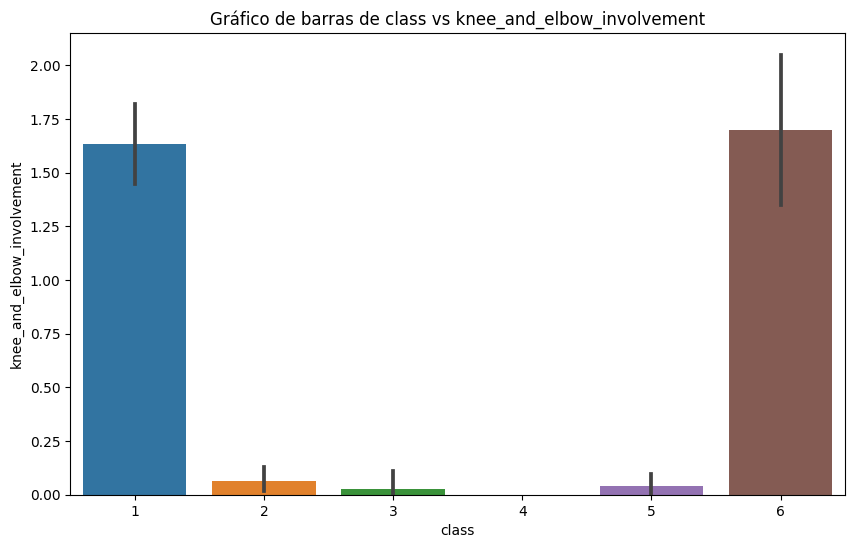

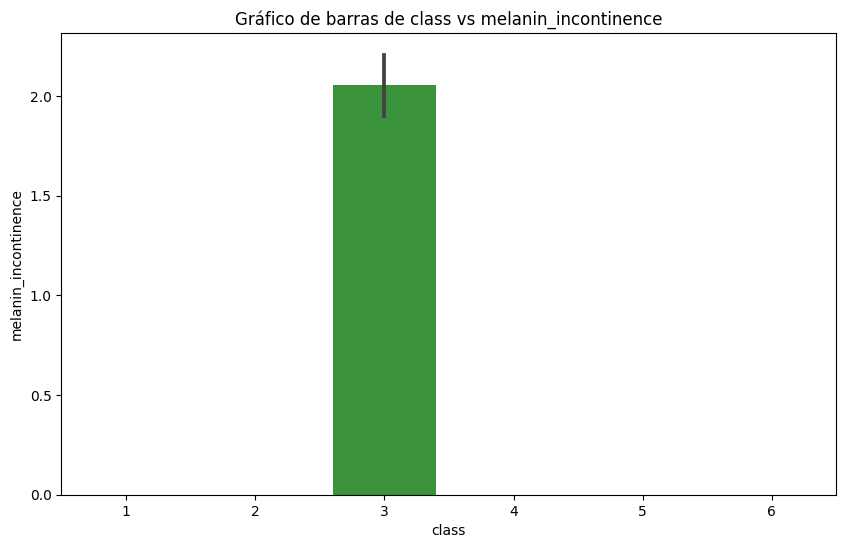

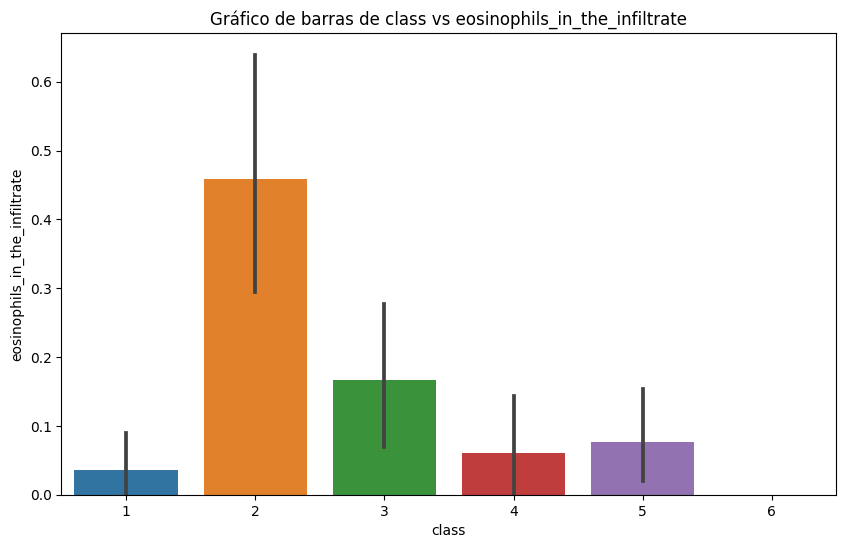

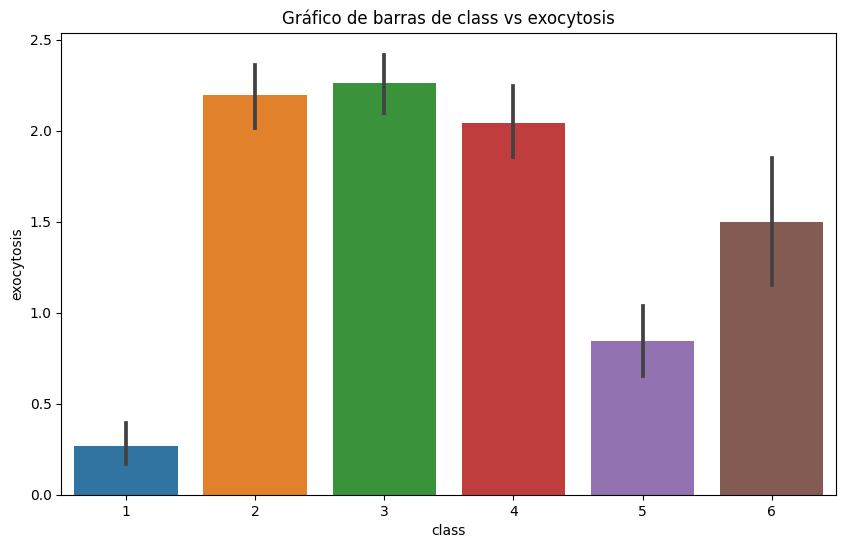

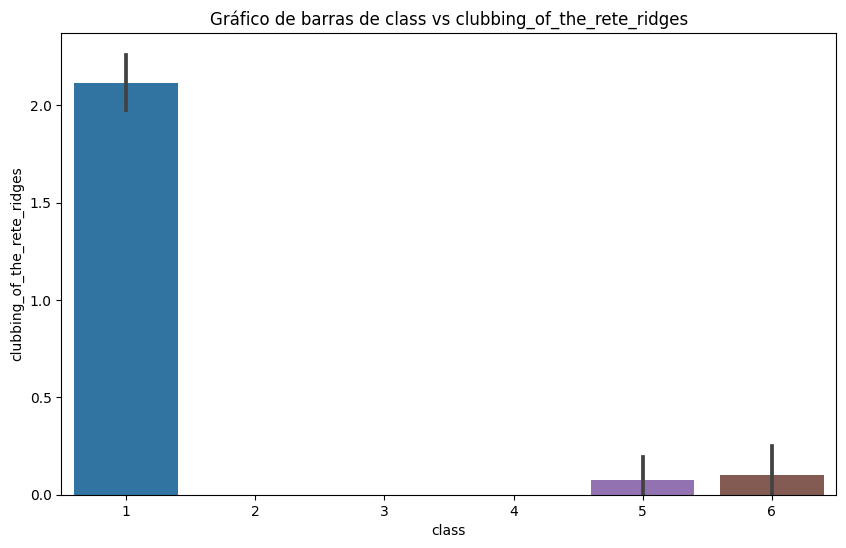

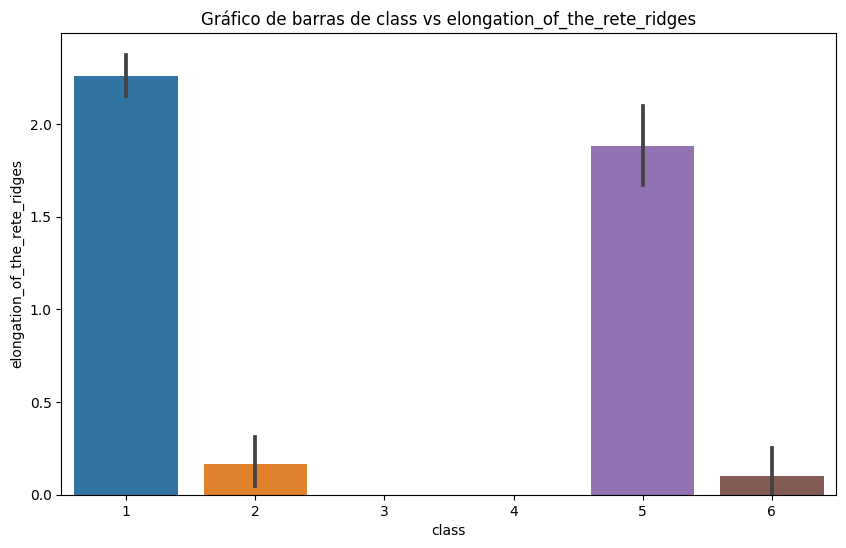

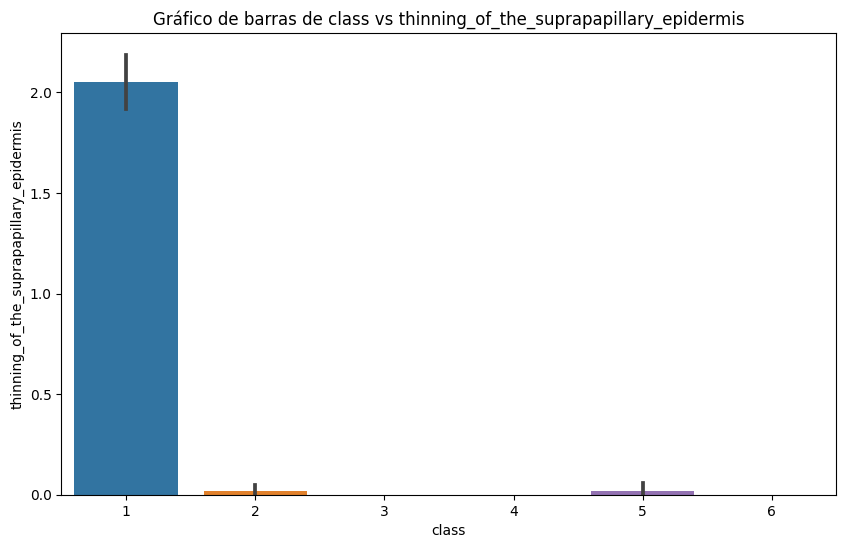

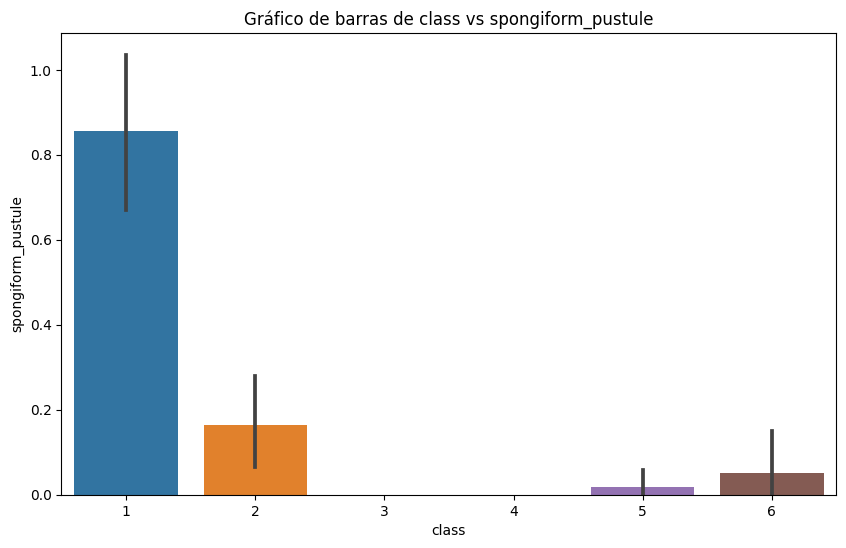

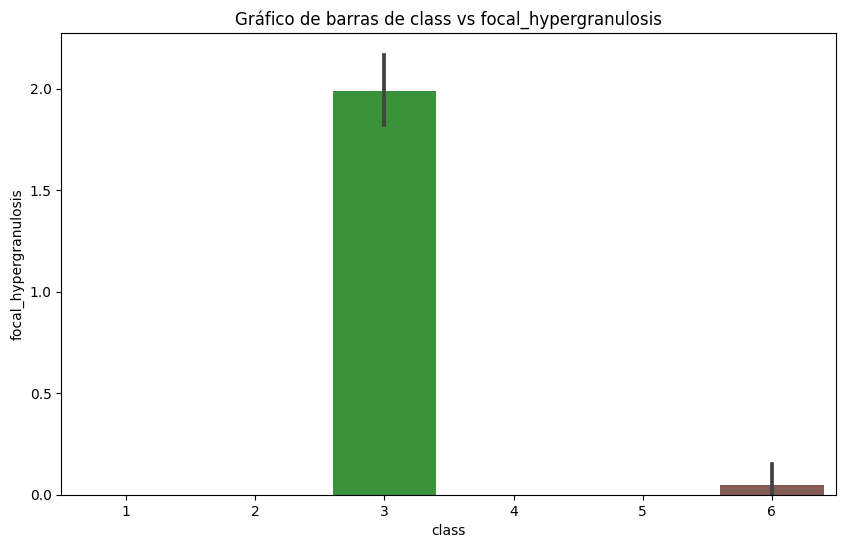

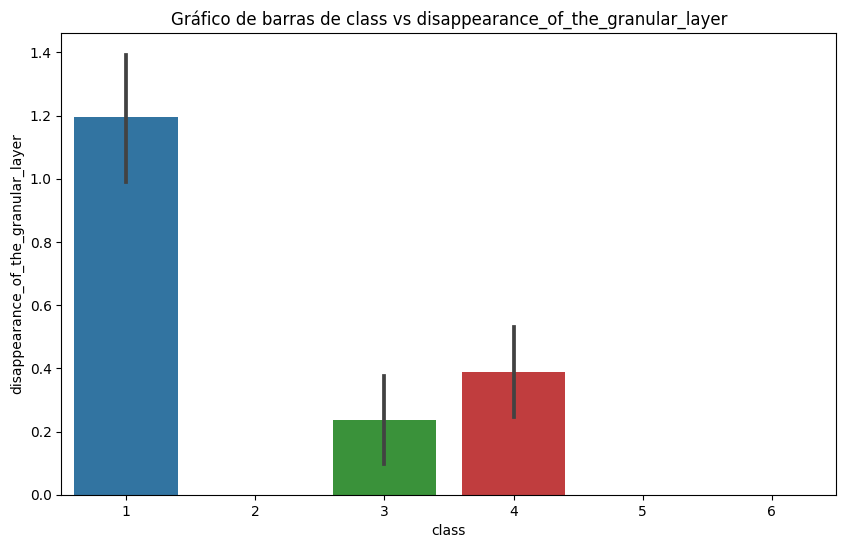

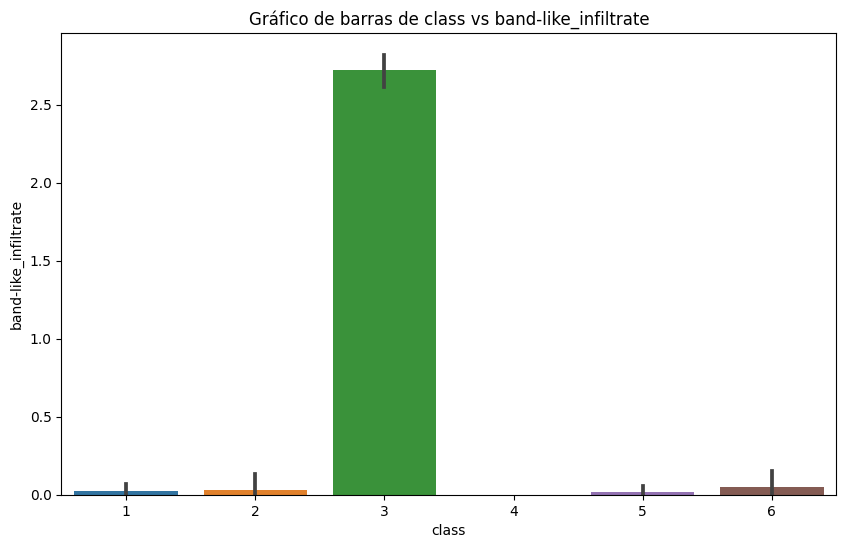

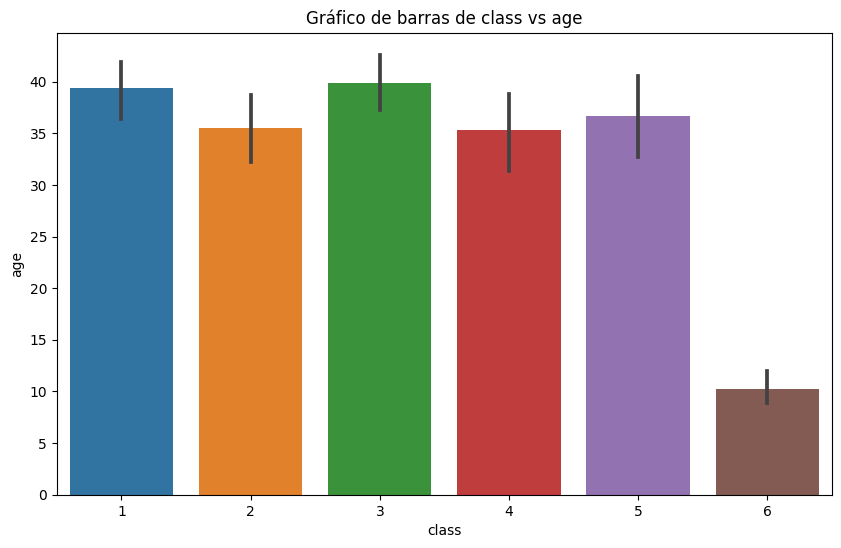

In [11]:
import seaborn as sns

for column_index, column in enumerate(dermatology.columns):
    if column == 'class':
        continue
    plt.figure(figsize=(10, 6))
    sns.barplot(x='class', y=column, data=dermatology)
    plt.title(f'Gráfico de barras de class vs {column}')
    plt.show()

- Seaborn ViolinPlot

In [12]:
import seaborn as sns

# Determina el número de filas y columnas en función de la cantidad de columnas en tu DataFrame
num_rows = len(dermatology.columns) // 5 + len(dermatology.columns) % 5  # Asegura al menos 2 filas
num_cols = 5

plt.figure(figsize=(25, 25))
for column_index, column in enumerate(dermatology.columns):
    if column == 'class':
        continue
    plt.subplot(num_rows, num_cols, column_index + 1)
    sns.violinplot(x='class', y=column, data=dermatology)

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

- Seaborn Pairplot

In [80]:
sns.pairplot(dermatology,hue="class")
plt.show()

- Correlation system

In [13]:
corr = dermatology.corr(method="pearson")
corr

erythema   scaling   
erythema                                  1.000000  0.435467  \
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
pnl_infiltrate                            0.224095  0.282486   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.055432  0.013149   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
age                                      -0.004974  0.015830   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching   
erythema                                          0.260087 -0.047623  \
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
pnl_infiltrate                                    0.041330 -0.145288   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.043894 -0.008460   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

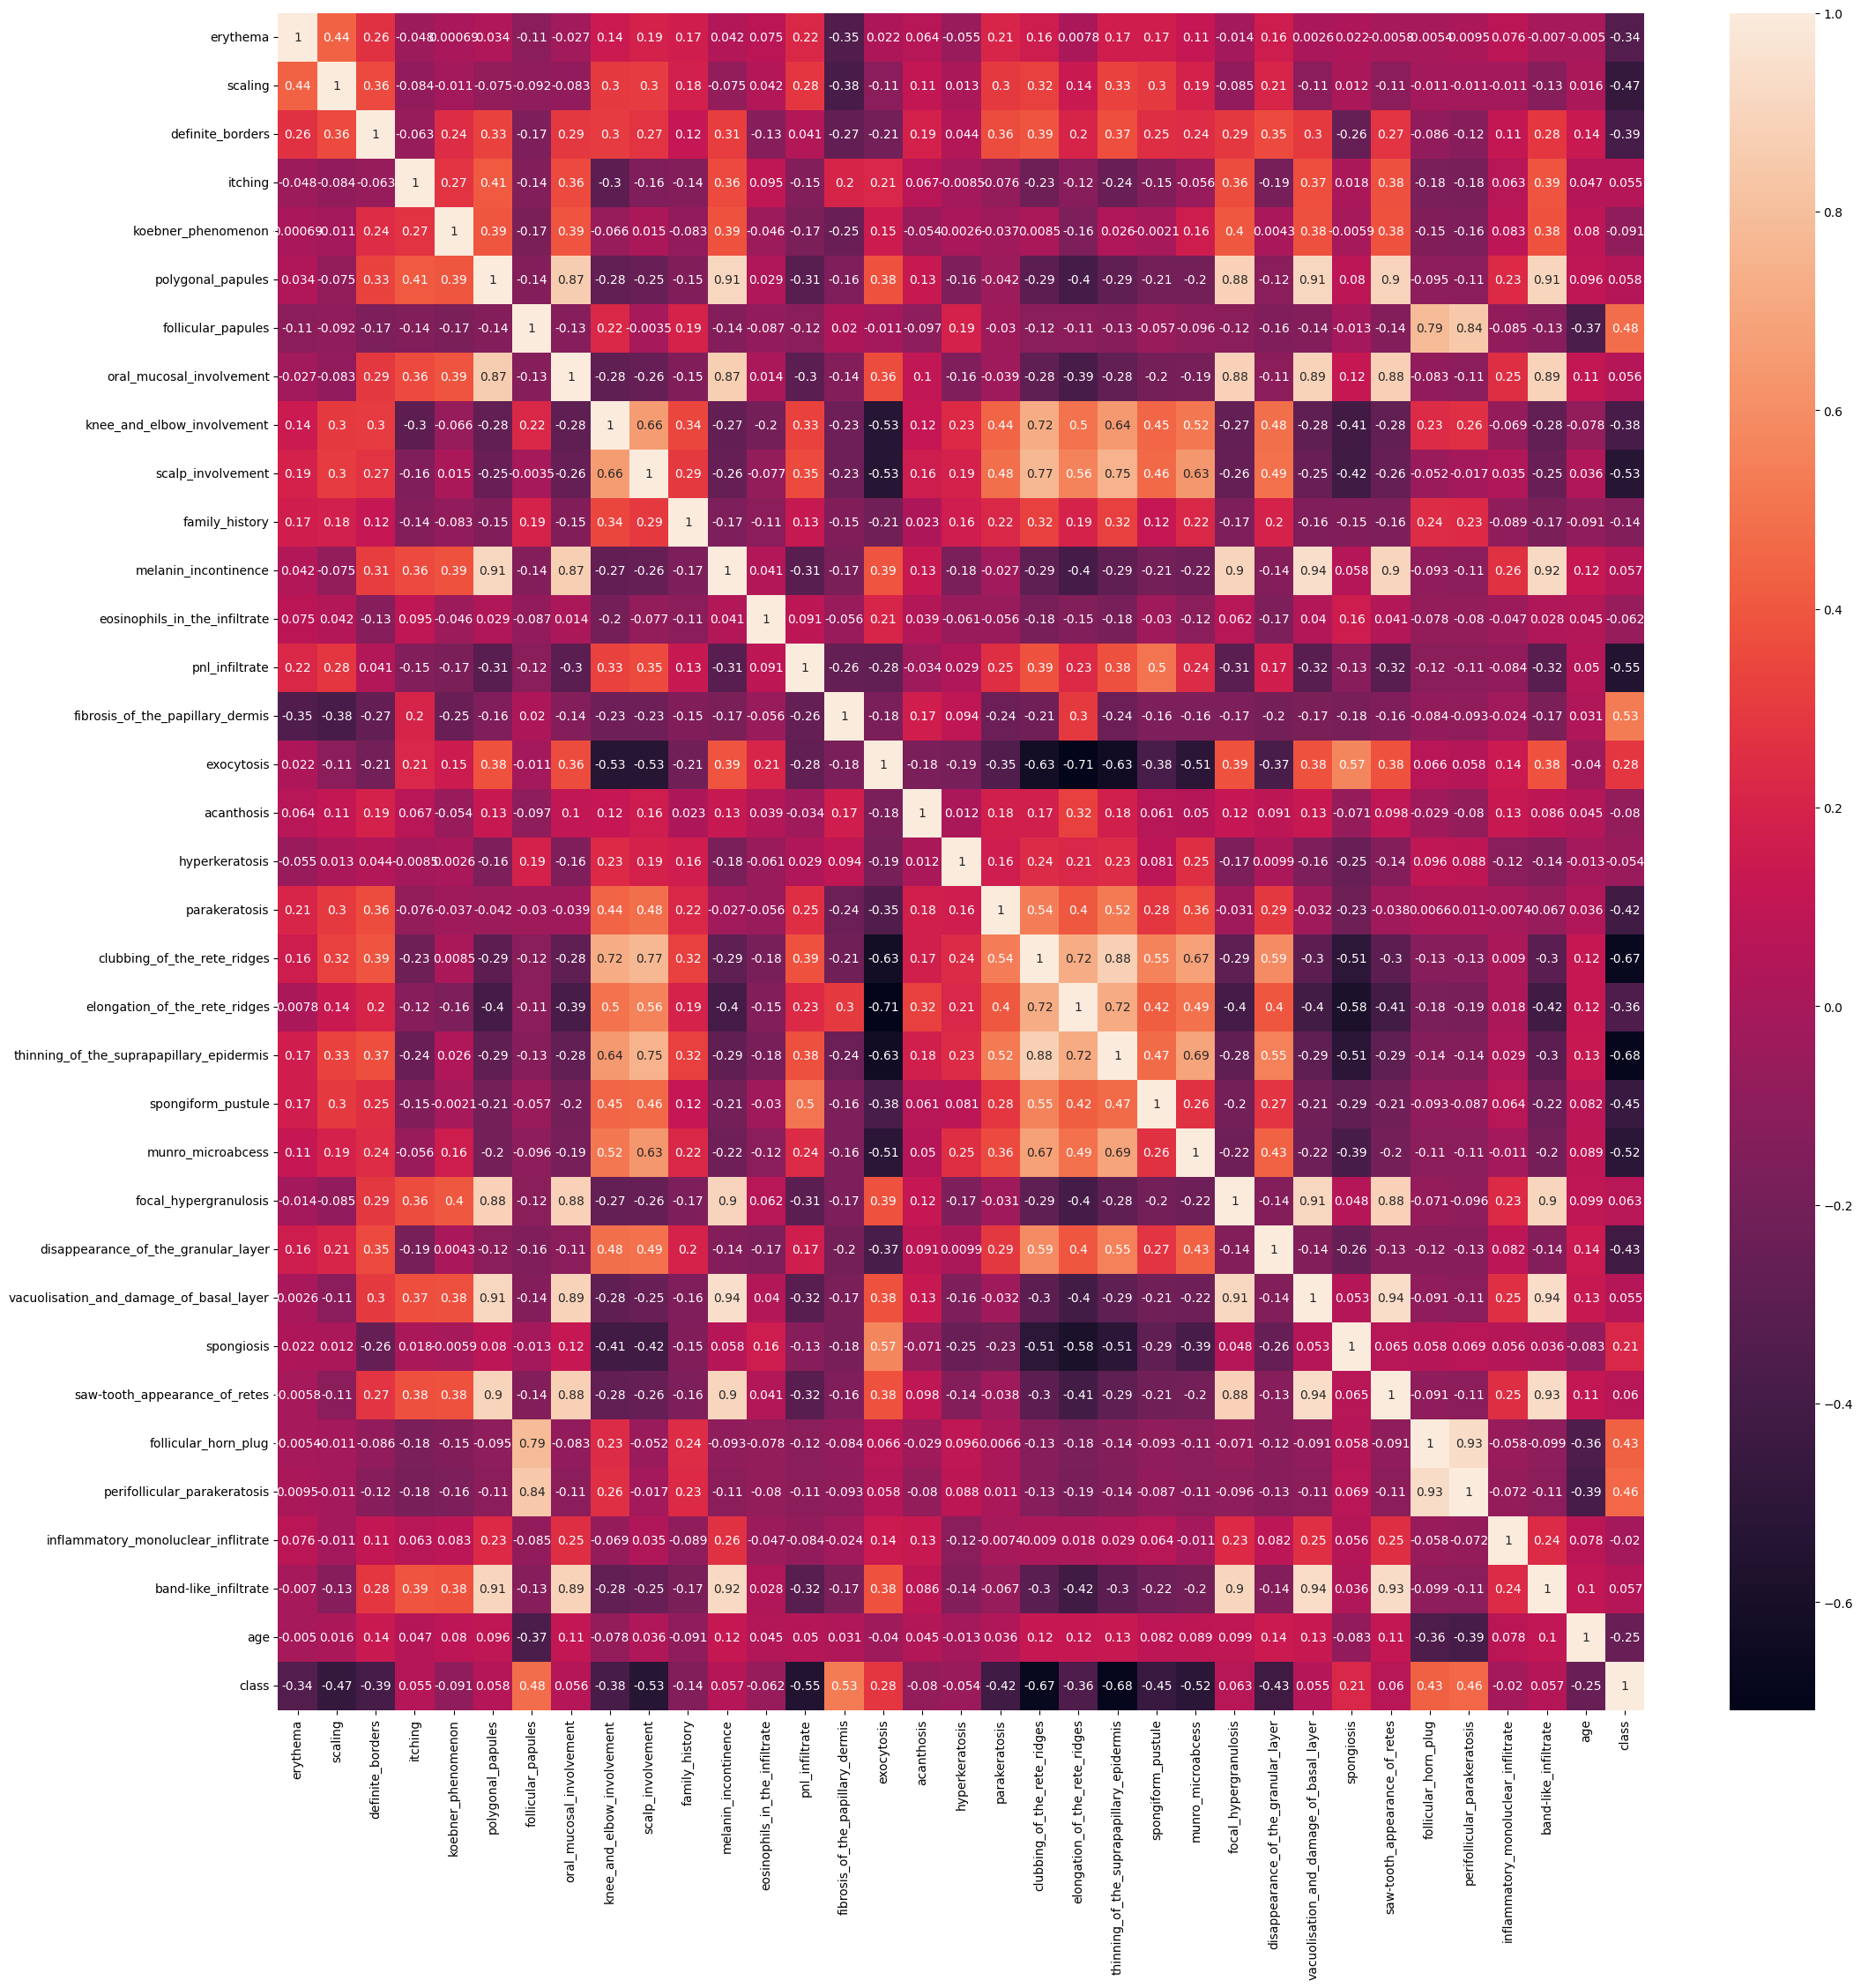

In [14]:
#Heat map
plt.figure(figsize=(25, 25))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)
plt.show()

# **DATA PREPROCESSING**

Data pre-processing. Training set preparation and validation for subsequent model generation.

In [15]:
from sklearn.preprocessing import StandardScaler #z = (x - mean) / std
dermatology_s = dermatology.copy()
std_scaler = StandardScaler()
#We escalate all the data unless the class column from the dataframe
for col in range(len(dermatology_s.columns)-1):
    dermatology_s.iloc[:,col] = std_scaler.fit_transform(dermatology_s.iloc[:, col].values.reshape(-1,1))

print(dermatology_s.head())
print(dermatology.head())

   erythema   scaling  definite_borders   itching  koebner_phenomenon   
0 -0.102895  0.292503         -1.709375  1.437334           -0.699049  \
1  1.403482  1.719916          1.600843  0.557628            0.403761   
2 -0.102895 -1.134911          0.497437  1.437334            0.403761   
3 -0.102895  0.292503          0.497437 -1.201784           -0.699049   
4 -0.102895  1.719916          0.497437  0.557628            1.506571   

   polygonal_papules  follicular_papules  oral_mucosal_involvement   
0          -0.468702           -0.292496                 -0.452637  \
1          -0.468702           -0.292496                 -0.452637   
2           2.669312           -0.292496                  3.148777   
3          -0.468702           -0.292496                 -0.452637   
4           1.623308           -0.292496                  1.948306   

   knee_and_elbow_involvement  scalp_involvement  ...   
0                    0.392453          -0.574000  ...  \
1                    0.392

* Split train and test:

Training with train set and evaluation with test set (data not seen by the model). Actual measurement of model accuracy

In [16]:
from sklearn.model_selection import train_test_split #ML library

X = dermatology.drop(labels='class', axis=1)
Y = dermatology['class']-1

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)
#stratify = dermatology_s['class']
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(256, 34) (256,)
(110, 34) (110,)


In [17]:
from sklearn.model_selection import train_test_split #ML library

X_s = dermatology_s.drop(labels='class', axis=1)
Y_s = dermatology_s['class']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_s, Y_s, test_size=0.3,random_state=1)
#stratify = dermatology_s['class']
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(256, 34) (256,)
(110, 34) (110,)


We explore the information in the train and test set.

In [18]:
print(y_train.value_counts(),'\n',y_test.value_counts())

class
0    77
2    49
1    42
4    39
3    32
5    17
Name: count, dtype: int64 
 class
0    35
2    23
1    19
3    17
4    13
5     3
Name: count, dtype: int64


# **MODELLING & EVALUATION**

Generation and evaluation of Machine Learning models that best fit the objective and achieve the KPIs of the project:

Training: Classification; Regression; Clustering.
Evaluation: Accuracy, precision, mean square error....

## Build and fit a classifier

In [19]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(x_train, y_train)
predictions = cls.predict(x_test)

Fitting to the training data: 100%|███████████████████████████████████████████████████████████████████████████████████| 3600/3600 [1:00:09<00:00,  1.00s/it, The total time budget for this task is 1:00:00]


In [43]:
predictions

array([0, 2, 1, 2, 1, 4, 0, 1, 3, 1, 0, 4, 2, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       0, 2, 3, 4, 4, 2, 4, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 5, 1, 2, 4,
       3, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 2, 3, 1, 1, 2, 3, 4, 0, 2,
       0, 1, 0, 3, 4, 2, 4, 1, 4, 2, 1, 2, 2, 2, 4, 3, 5, 2, 0, 4, 1, 3,
       1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 3, 5, 3, 3, 4, 1, 1, 0, 2, 0, 0, 0])

## View the models found by auto-sklearn

In [22]:
print(cls.leaderboard())

          rank  ensemble_weight                 type      cost    duration
model_id                                                                  
2            1             0.04        random_forest  0.011765   13.097949
22           5             0.02        random_forest  0.011765   15.053125
27           4             0.02           libsvm_svc  0.011765    7.131783
42           3             0.02                  qda  0.011765    6.337215
51           2             0.02                  lda  0.011765    7.828454
61           6             0.02           libsvm_svc  0.011765    6.591662
28           8             0.08   passive_aggressive  0.023529   15.087282
29           9             0.08        random_forest  0.023529   13.448633
39          11             0.06   passive_aggressive  0.023529    6.999316
43          10             0.02                  lda  0.023529    6.119279
55           7             0.04   passive_aggressive  0.023529    7.135775
12          12           

## Print the final ensemble constructed by auto-sklearn

In [27]:
from pprint import pprint
pprint(cls.show_models())

{2: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x4093922be0>,
     'cost': 0.0117647058823529,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x409460f490>,
     'ensemble_weight': 0.04,
     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x4093922f40>,
     'model_id': 2,
     'rank': 1,
     'sklearn_classifier': RandomForestClassifier(max_features=5, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
 6: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x409d0ea940>,
     'cost': 0.07058823529411762,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x4094832d30>,
     'ensemble_weigh

 53: {'balancing': Balancing(random_state=1),
      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40b8898820>,
      'cost': 0.08235294117647063,
      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40b84b9940>,
      'ensemble_weight': 0.04,
      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40b8898220>,
      'model_id': 53,
      'rank': 34,
      'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=False,
                               l2_regularization=0.00019023452457935197,
                               learning_rate=0.04315327900149951, max_iter=512,
                               max_leaf_nodes=192, min_samples_leaf=2,
                               n_iter_no_change=0, random_state=1,
                               validation_fraction=None, warm_start=True)},
 55: {'balancing': Balancin

## Show Metrics/Classification Method

In [42]:
from autosklearn.metrics import balanced_accuracy, precision, recall, f1

def get_metric_result(cv_results):
    results = pd.DataFrame.from_dict(cv_results)
    results = results[results["status"] == "Success"]
    cols = ["rank_test_scores", "param_classifier:__choice__", "mean_test_score"]
    cols.extend([key for key in cv_results.keys() if key.startswith("metric_")])
    return results[cols]

print(get_metric_result(cls.cv_results_).to_string(index=False))

ValueError: All arrays must be of the same length

## Get the score of the final ensemble

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score", accuracy_score(y_test, predictions))
print("Precision score", precision_score(y_test, predictions, average='weighted'))
print("Recall score", recall_score(y_test, predictions, average='weighted'))
print("F1 score", f1_score(y_test, predictions, average='weighted'))

Accuracy score 0.9818181818181818
Precision score 0.9818181818181818
Recall score 0.9818181818181818
F1 score 0.9818181818181818


## Display confusion matrix

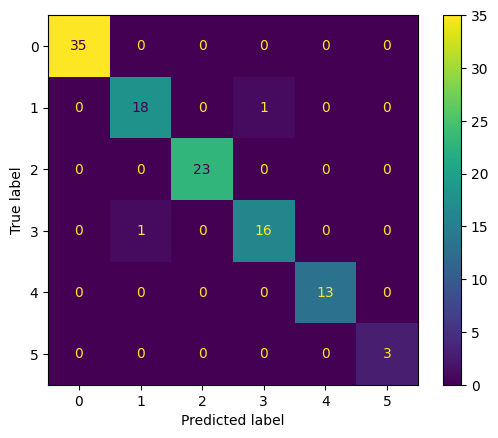

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
disp.plot()
plt.show()

In [155]:
from os import X_OK
import numpy as np
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

skf = StratifiedKFold(n_splits=10)

acuracy_list =[]
recall_list =[]
precision_list =[]
f1_list =[]

parameters = [[2,4,6,8,10,12,14,16], ['linear','poly','rbf','sigmoid','precomputed']]
models = [XGBClassifier, SVC]

for model in models:
    for param in parameters[models.index(model)]:
        acuracy_score_list =[]
        recall_score_list =[]
        precision_score_list =[]
        f1_score_list =[]

        for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
            x_train= X.iloc[train_index]
            y_train= Y.iloc[train_index]
            y_test= Y.iloc[test_index]
            x_test= X.iloc[test_index]

            if model == XGBClassifier:
                cls = model(max_depth=param)
            else:
                cls = model(kernel=param)

            cls = cls.fit(x_train, y_train)
            y_prediction = cls.predict(x_test)

            acuracy_score_list.append(accuracy_score(y_test,y_prediction))
            recall_score_list.append(recall_score(y_test,y_prediction, average='macro'))
            precision_score_list.append(precision_score(y_test,y_prediction, average='macro'))
            f1_score_list.append(f1_score(y_test,y_prediction, average='macro'))

        accuracy=np.mean(acuracy_score_list)
        precision=np.mean(precision_score_list)
        recall=np.mean(recall_score_list)
        f1=np.mean(f1_score_list)

        print(param)
        print("Accuracy: ",accuracy)
        acuracy_list.append(accuracy)
        print("Precision: ",precision)
        precision_list.append(precision)
        print("Recall: ",recall)
        recall_list.append(recall)
        print("F1: ",f1)
        f1_list.append(f1)

df = pd.DataFrame({'f1': f1_list, 'accuracy': acuracy_list})



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## **CLASIFICATION**

---

AUTO-SKLEARN

---

To train the data we are going to use the autosklearn library to compare several classification algorithms and with this tool we will be able to analyse which is the best algorithm for our problem

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(x_train, y_train)
predictions = cls.predict(x_test)